In [1]:
import sympy  as sp
from sympy import *
import numpy as np
#Para resolver sistemas de ecuaciones diferencials 
from sympy.solvers.ode.systems import dsolve_system

In [2]:
sp.interactive.printing.init_printing(use_latex=True)

In [89]:
#Declaración de las variables que vamos a usar
t, x, y, z, sigma,c,R= sp.symbols('t x y z  sigma,c,R')
#Esto aunque son variables vamos a ponerlas como variables para que sea mas elegante
G, c = sp.symbols("G c")
#Vector con las variables que vamos a usar 
variables = [t,x,y,z]

In [107]:
x_t = sp.Function('x_s')(t)
x_t

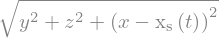

In [91]:
r = sqrt((x-x_t)**2+y**2+z**2)
r

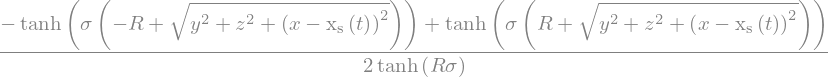

In [99]:
f = (tanh(sigma*(r+R))-tanh(sigma*(r-R)))/(2*tanh(sigma*R))
f


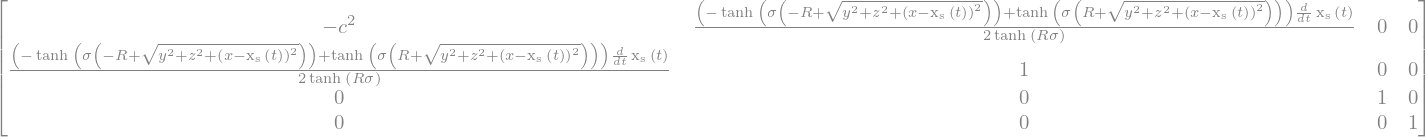

In [108]:
#Expreso la métrica en forma matricial 
g = sp.Matrix([[-c**2,x_t.diff()*f,0,0],
    [x_t.diff()*f,1,0,0],
     [0,0,1,0],
     [0,0,0,1]])
g

In [122]:
#Esto es para poder hacerlo en python y no en sympy que es horrible
g= [[-c**2,x_t.diff()*f,0,0],
    [x_t.diff()*f,1,0,0],
     [0,0,1,0],
     [0,0,0,1]]
det = -c**2 - x_t.diff()*f

g_inv_sp = [[simplify(-c**2/det) ,simplify(-(x_t.diff()*f)**2/det),0,0],
             [simplify(-(x_t.diff()*f)**2/det),simplify(-1/det),0,0],
             [0,0,simplify((1-(x_t.diff()*f)**2)/det),0],
             [0,0,0,simplify((1-(x_t.diff()*f)**2)/det)]]

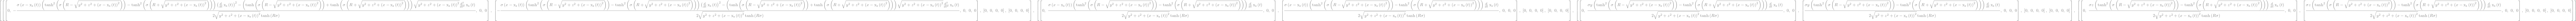

In [123]:
#Este vector va a contener la matriz g derivada respecto de cada la variable
#Por ejemplo derivadas_variable[0] es la derivada de toda la matriz respecto de t
#            derivadas_variable[1] es la derivada de toda la matriz respecto de x
#Y derivadas_variable[1][0][0] es la derivad parcial de g_{0,0} respecto x
# y así sucesivamente 
derivadas_variable = []

for variable in variables: 
    derivada_variable = [[0 for i in variables] for j in variables]
    for i in range(len(variables)):
        for j in range(len(variables)): 
            funcion = g[i][j]
            #Para no hacer la derivada de un número 
            if type(funcion) == sp.core.mul.Mul or type(funcion) == sp.core.power.Pow: 
                derivada_variable[i][j] = simplify(funcion.diff(variable))
                
    derivadas_variable.append(derivada_variable)
derivadas_variable

In [124]:


#Esta matriz va a tener los simbolos de chistoffle 
#Por ejemplo, simbolo_chirtoffle[2][0][1] sería \gamma^y_{t,x}
simbolos_chistoffle = [[[0 for j in variables] for i in variables] for m in variables]


for m in range(len(variables)):
    for i in range(len(variables)):
        for j in range(len(variables)):
            simbolo = 0
            #El sumatorio respecto del indice libre l 
            for l in range(len(variables)):
                #Para evitar hacer una multiplicación por 0 
                if  g_inv[m][l] != 0: 
                    simbolo =simbolo + g_inv[m][l]*(derivadas_variable[j][i][l]+derivadas_variable[i][j][l]-derivadas_variable[l][i][j])
            #Aquí multiplico  por el 1/2 que hemos sacado de factor común 
            simbolo =1/2*simbolo
            simbolos_chistoffle[m][i][j] = simplify(simbolo)

t t t


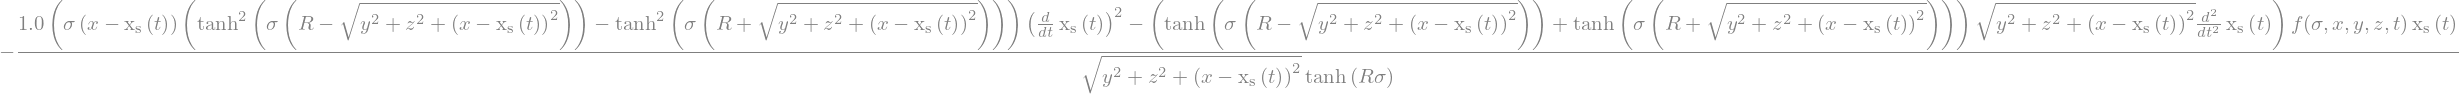

t t x


t t y


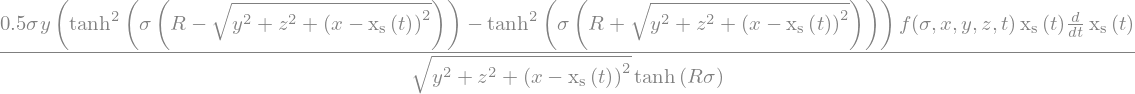

t t z


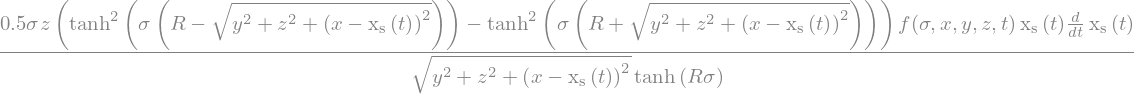

t x t


t x x


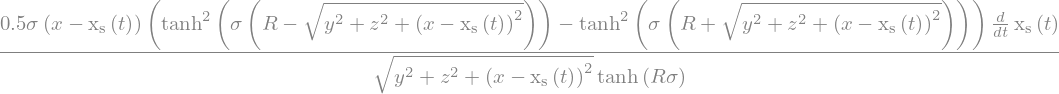

t x y


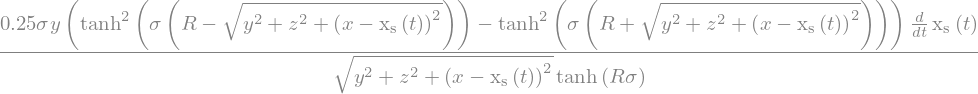

t x z


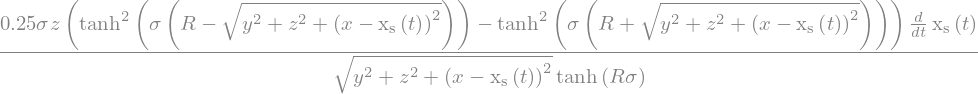

t y t


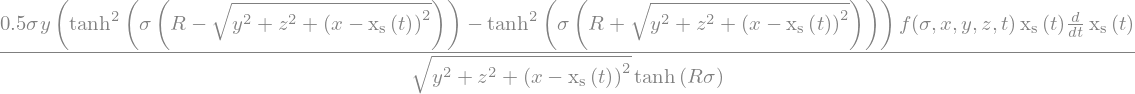

t y x


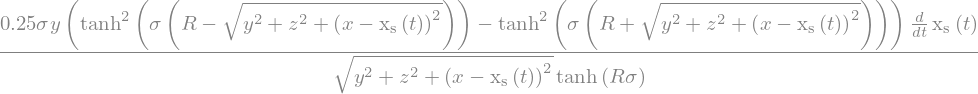

t y y


t y z


t z t


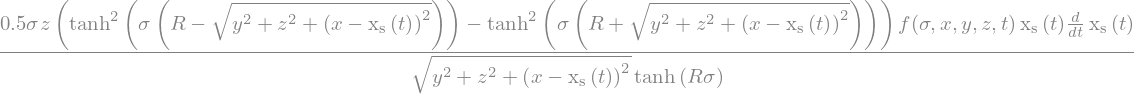

t z x


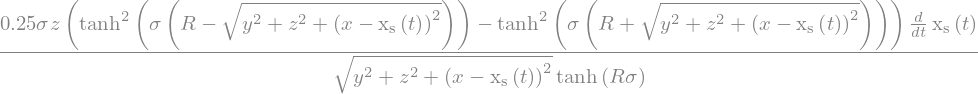

t z y


t z z


x t t


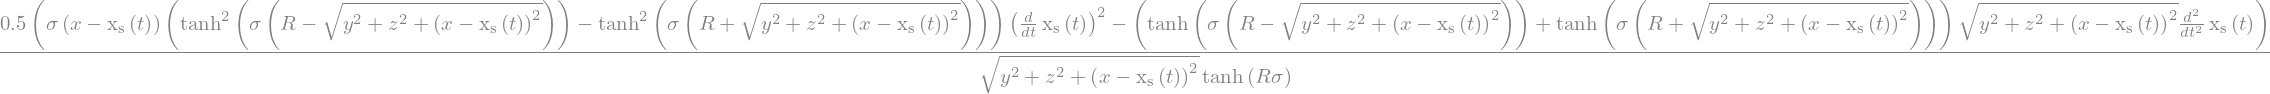

x t x


x t y


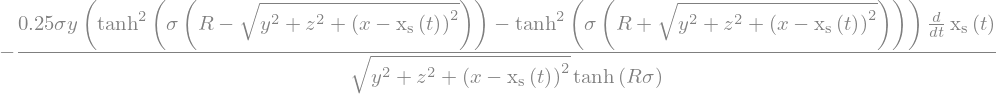

x t z


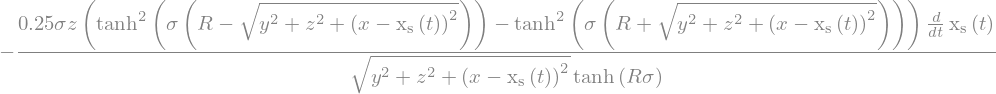

x x t


x x x


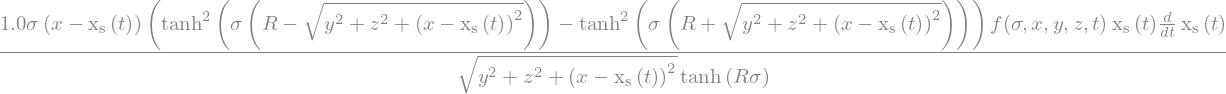

x x y


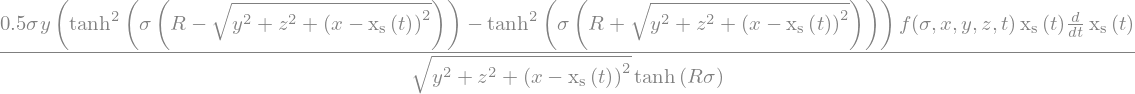

x x z


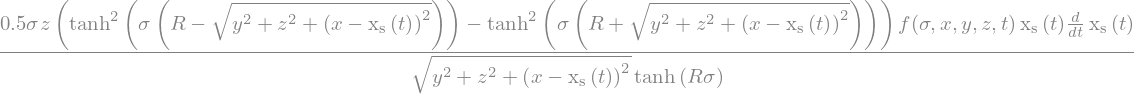

x y t


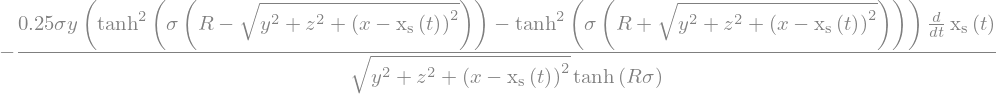

x y x


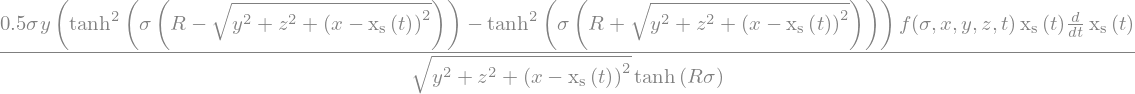

x y y


x y z


x z t


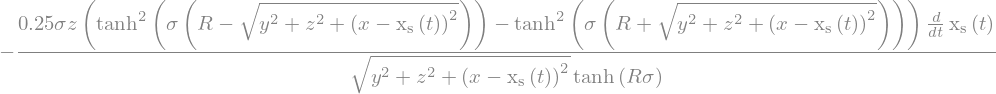

x z x


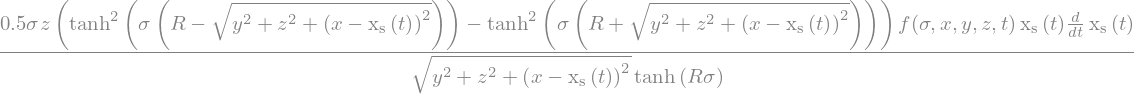

x z y


x z z


y t t


y t x


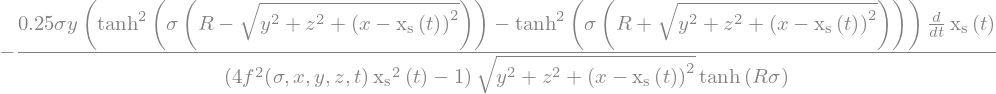

y t y


y t z


y x t


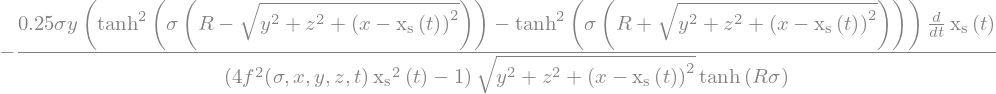

y x x


y x y


y x z


y y t


y y x


y y y


y y z


y z t


y z x


y z y


y z z


z t t


z t x


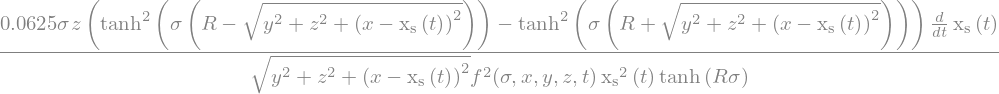

z t y


z t z


z x t


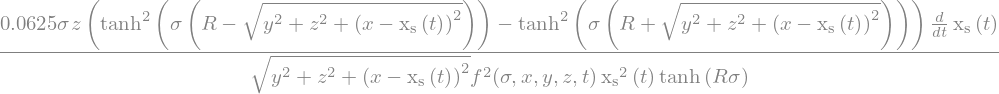

z x x


z x y


z x z


z y t


z y x


z y y


z y z


z z t


z z x


z z y


z z z


In [125]:


for i in range(len(simbolos_chistoffle)):
    for j in range(len(simbolos_chistoffle)):
        for k in range(len(simbolos_chistoffle)):
            print(variables[i],variables[j],variables[k])
            display(simbolos_chistoffle[i][j][k])

In [126]:
#Variable para poder derivar 
tau = sp.symbols("tau")

#Defino las derivadas, esto para poder resolverlo 
dt = sp.Function('dt')(tau)
dx = sp.Function("dx")(tau)
dy = sp.Function('dy')(tau) 
dz =  sp.Function('dz')(tau)

#Quitamos dz
variables_derivadas = [dt,dx,dy,dz]


In [127]:

geodesicas = [i.diff(tau) for i in variables_derivadas]

for variable in range(len(variables)): 
    for i in range(len(variables)):
        for j in range(len(variables)):
            geodesicas[variable] = geodesicas[variable] +simplify( simbolos_chistoffle[variable][i][j]*variables_derivadas[i]*variables_derivadas[j])
    geodesicas[variable] = sp.Eq(geodesicas[variable],0)
    


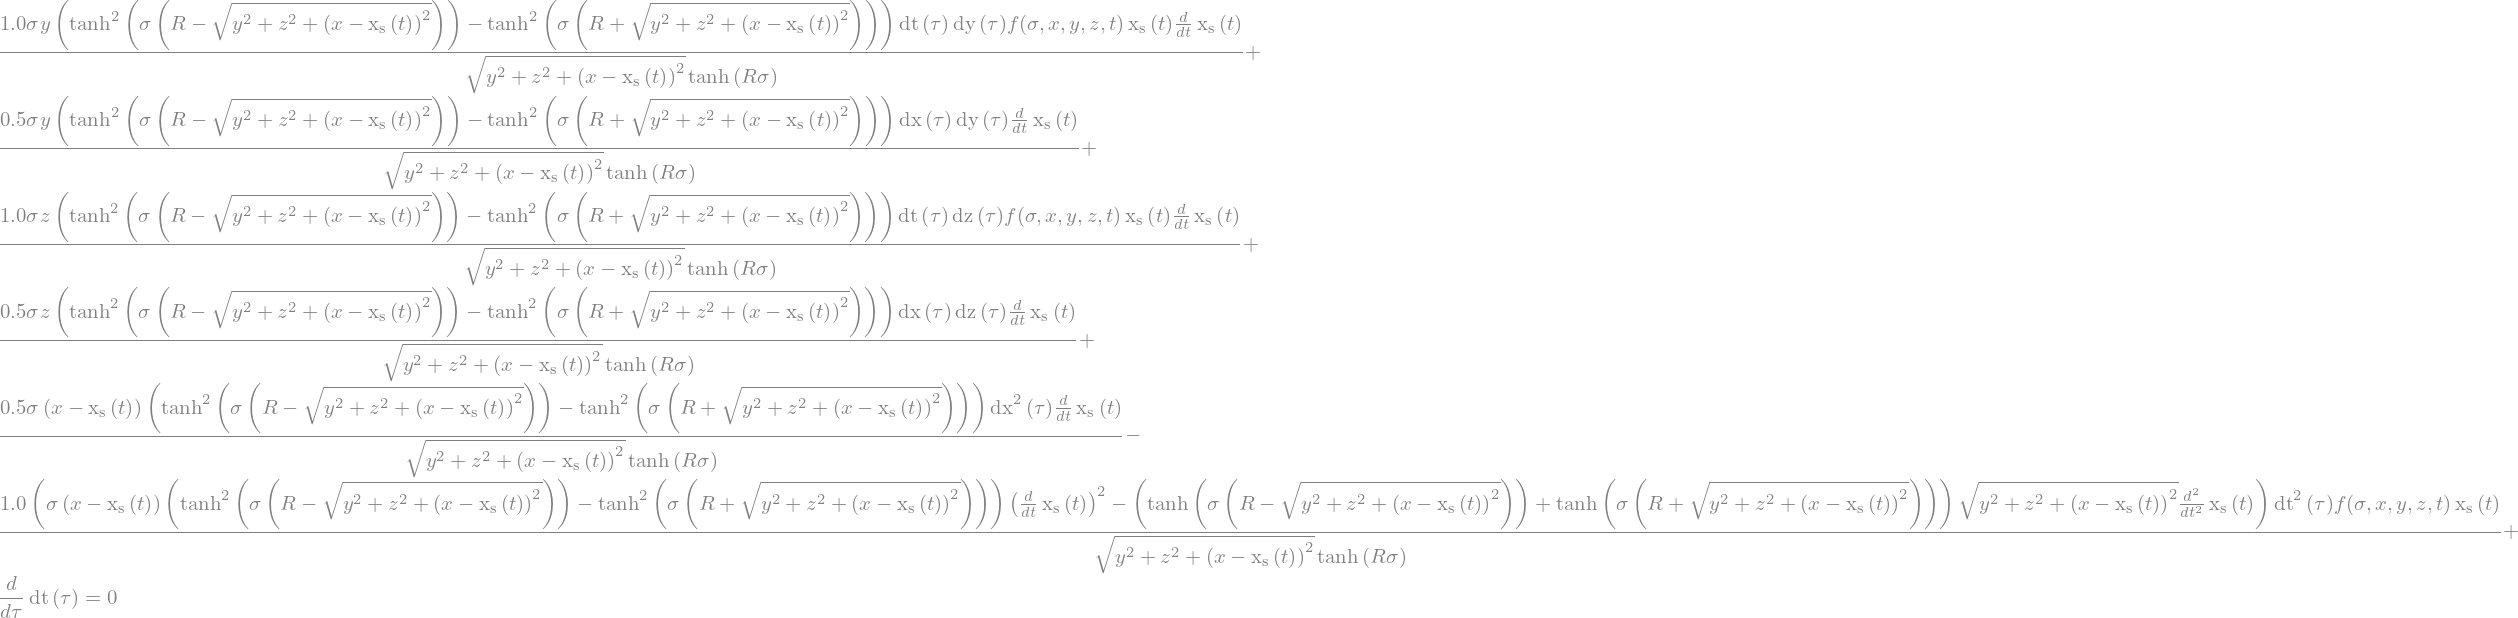

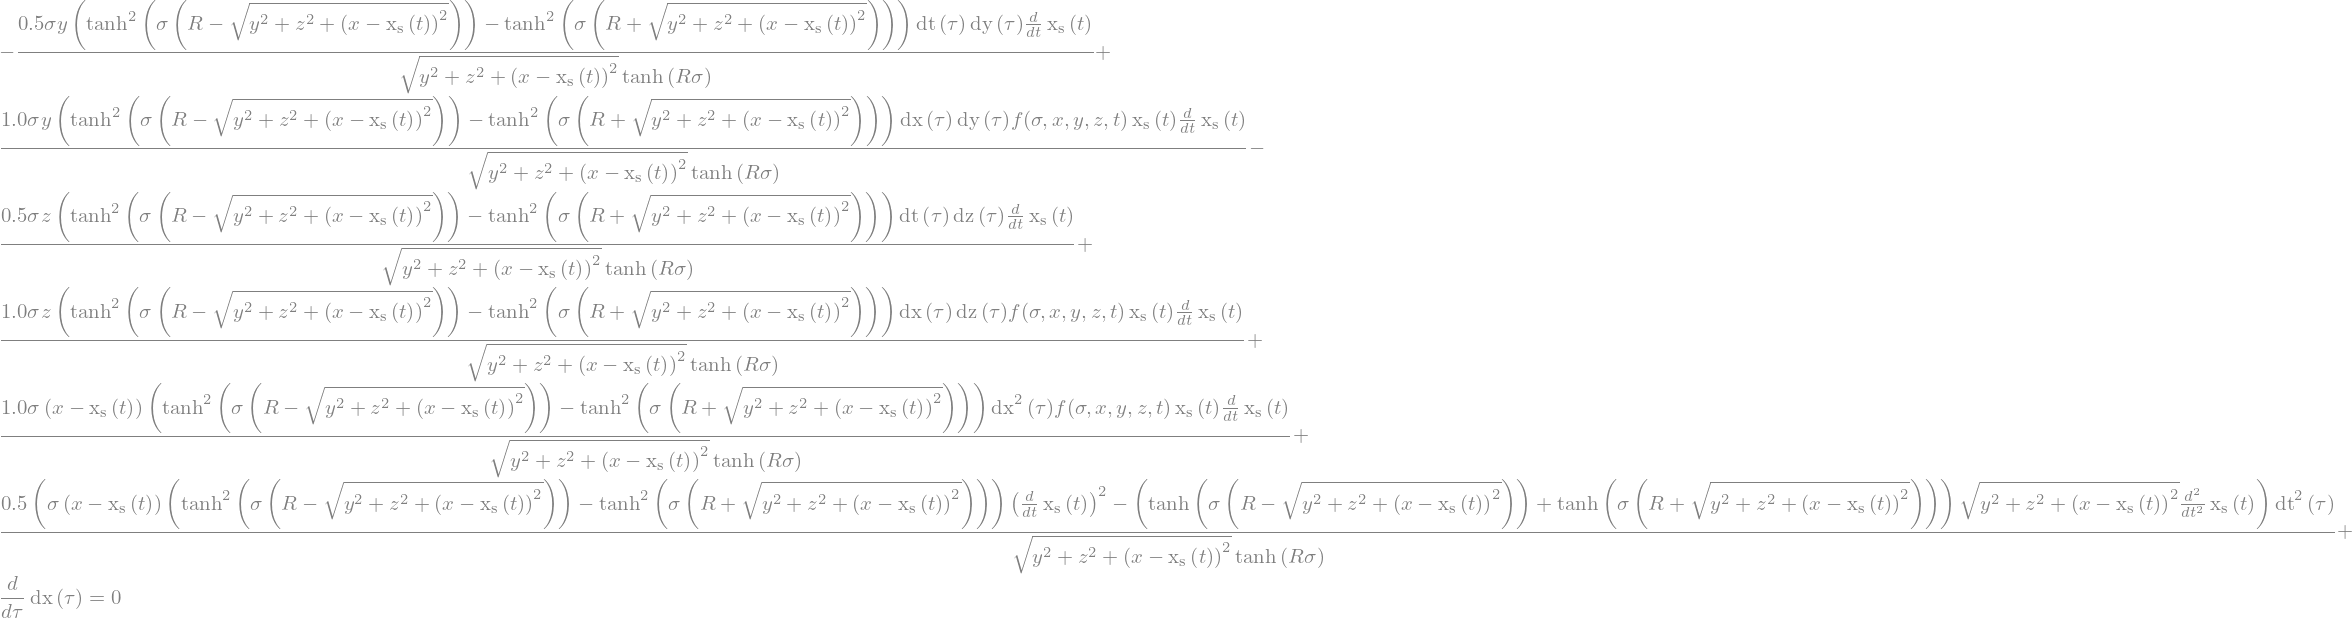

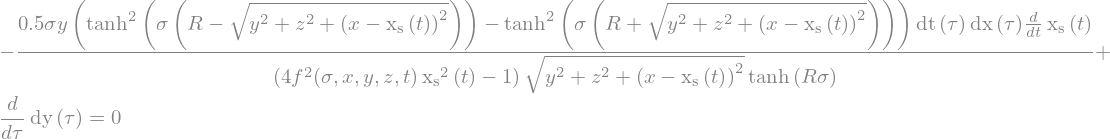

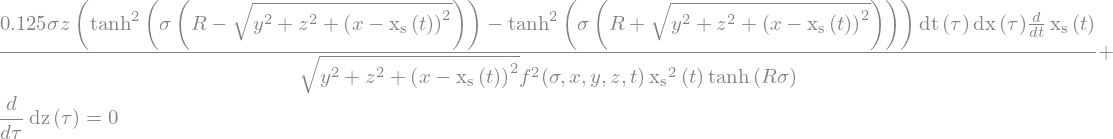

In [128]:
for v in geodesicas: 
    display(v)

In [129]:
t = sp.Function('t')(tau)
x = sp.Function('x')(tau)
y = sp.Function('y')(tau)

In [130]:
u_0 =  sp.Function('u_0')(tau)
u_1 = sp.Function("u_1")(tau)
u_2 = sp.Function("u_2")(tau)